In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def roseplot(angles,gtype,color):

    #n_numbers = 100
    bins_number = 50  # the [0, 360) interval will be subdivided into this
    # number of equal bins
    bins = np.linspace(0.0,360 , bins_number + 1) #2 * np.pi
    #angles = 2 * np.pi * np.random.rand(n_numbers)
    n, _, _ = plt.hist(angles, bins)
    print(len(n))
    print(n)
    print(bins)
    plt.clf()
    width = 2 * np.pi / bins_number
    #width =np.deg2rad(bins_number)
    print(width)
    ax = plt.subplot(1, 1, 1, projection='polar')
    #fig,ax = plt.figure(projection = 'polar')
    bars = ax.bar(bins[:bins_number], n, width=width, bottom=0.0, label = gtype)#[:bins_number]
    #bars = plt.bar(bins[:bins_number], n, width=width, bottom=0.0, label = gtype)
    for bar in bars:
        bar.set_alpha(0.2)
    plt.show()

In [113]:
df = pd.read_csv('../data/PRFDR_angles.csv',index_col = 0)
df.head()

,time,iter,cell_id,type,angle
0,0,3,0,GM,4.530528
1,1,3,0,GM,39.989654
2,2,3,0,GM,40.991555
3,3,3,0,GM,45.423955
4,4,3,0,GM,87.634183


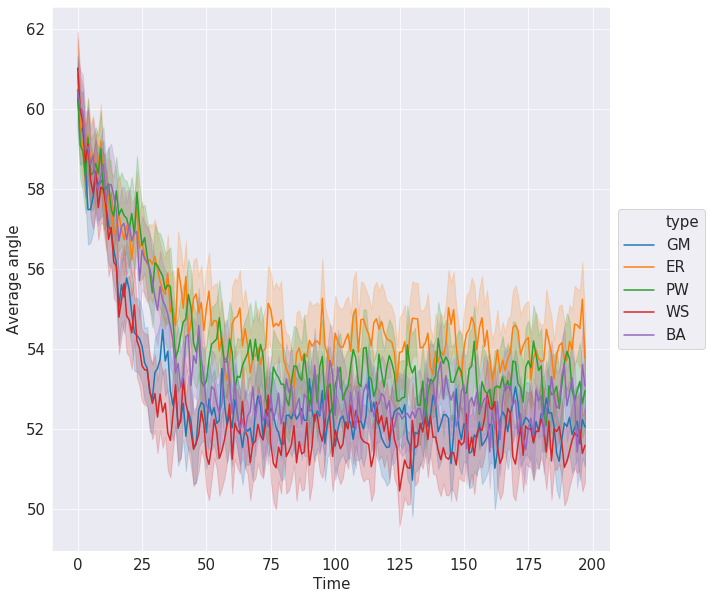

In [114]:
### average turning angle over time per graph type : 
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
plt.figure(figsize = (10,10))
sns.lineplot(x = 'time',y = 'angle',data = df,hue = 'type')
plt.ylabel('Average angle',fontsize = 15)
plt.xlabel('Time',fontsize = 15)
plt.legend(fontsize = 15,loc='center left', bbox_to_anchor=(1, 0.5))

In [115]:
### standard deviation in turning angle over time per graph type : 
# new df
graph_types = df.type.unique()
std_rows = []
for t in range(197):
    df_at_t = df[df.time == t]
    for gt in graph_types:
        angles = df_at_t[df_at_t.type == gt].angle
        std_rows.append([t,gt,np.std(angles)])


[37.8281662  38.17968472 37.80871517 38.17053928 37.98283199 37.10077273
 38.13558246 36.74820609 37.07567782 37.67016333 37.41486855 37.35658109
 37.29330997 37.8135831  37.93418871 37.43582634 37.77465688 37.50773884
 37.89144182 37.56388148 37.69757595 38.03170774 38.11178172 38.0675705
 37.86179043 37.54198271 38.00945578 37.82264132 37.89775195 37.92045439
 37.70938176 38.54716881 37.87372422 38.14615097 38.72426667 38.4508118
 38.39848429 38.05694633 38.65866127 38.37326328 38.35861644 38.63361626
 38.40935855 38.35593907 37.98878671 38.5884406  39.1920147  38.82002696
 38.69231543 38.67444815 38.67666572 38.29306378 38.37498437 38.69896321
 38.14323345 38.72534219 38.2038094  38.57474562 38.66712576 38.40351986
 38.19617672 38.52080222 38.22642378 38.80187377 38.35316421 38.6530287
 38.01706976 38.00972774 38.94317686 38.34130347 38.16747974 38.17084538
 38.06961705 38.43748538 38.12501592 38.30491188 38.5048278  38.41688265
 38.30761847 37.92740333 37.95511586 38.85520065 38.95

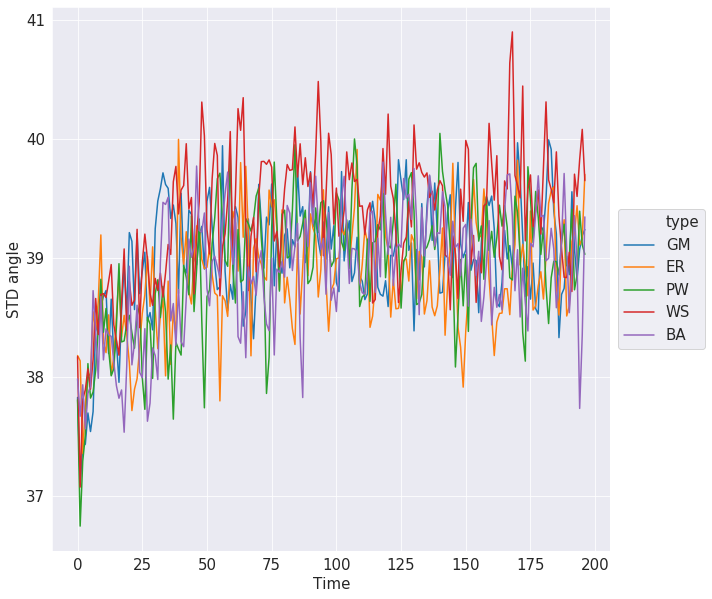

In [116]:
std_df = pd.DataFrame(data = std_rows,columns = ['time','type','std'])
print(std_df['std'].unique())
plt.figure(figsize = (10,10))
sns.lineplot(x = 'time',y = 'std',data = std_df,hue = 'type')
plt.ylabel('STD angle',fontsize = 15)
plt.xlabel('Time',fontsize = 15)
plt.legend(fontsize = 15,loc='center left', bbox_to_anchor=(1, 0.5))

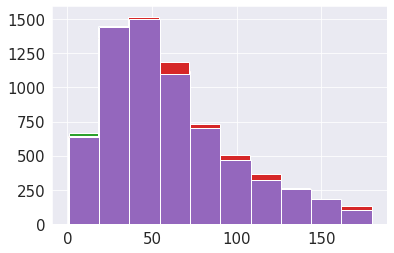

In [117]:
# plt.figure(figsize = (10,10))

df_at_zero = df[df.time == 0]
graph_types = df.type.unique()
colors = current_palette = sns.color_palette()[:5]
for i,gt in enumerate(graph_types):
    angles = df_at_zero[df_at_zero.type == gt].angle
    plt.hist(angles)
    #roseplot(angles,gt,colors[i]) 
    
# plt.legend()
# plt.show()

In [118]:
def roseplot(angles,gtype,color):
    #degrees = np.random.randint(0, 360, size=200)
    radians = np.deg2rad(angles)

    bin_size = 10
    a , b=np.histogram(angles, bins=np.arange(0, 360+bin_size, bin_size))
    centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])

    #fig = plt.figure(figsize=(10,8))
    ax = plt.subplot(111, projection='polar')
    bar = ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color=color, edgecolor='k',alpha = .1,label = gtype)
#     ax.set_theta_zero_location("N")
#     ax.set_theta_direction(-1)
    return ax

0


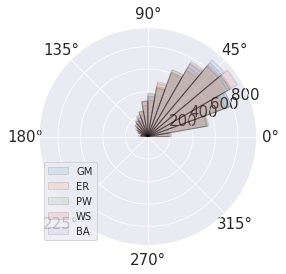

1


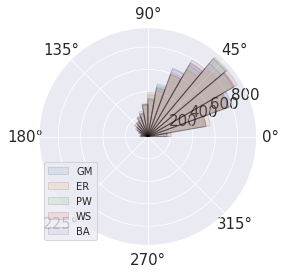

2


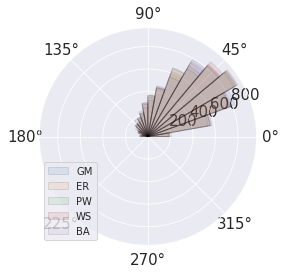

3


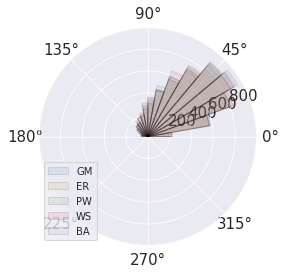

4


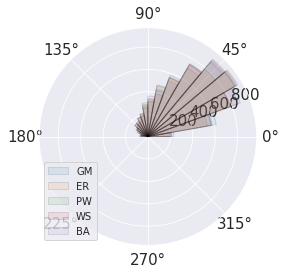

5


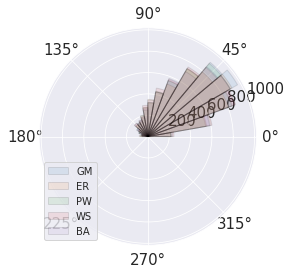

6


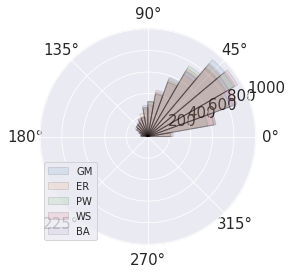

7


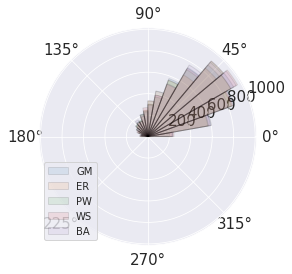

8


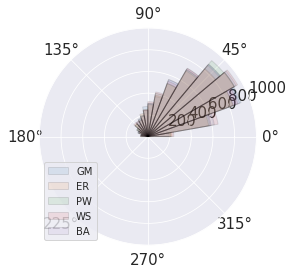

9


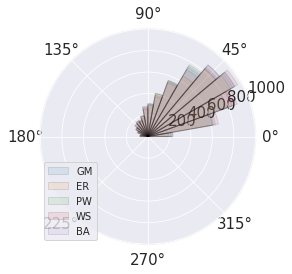

10


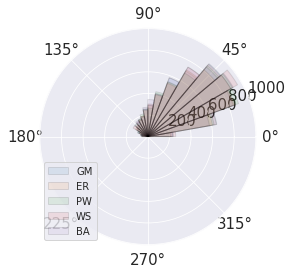

11


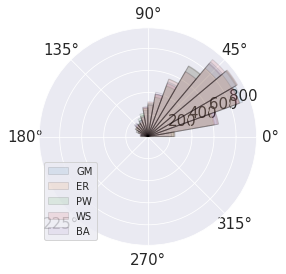

12


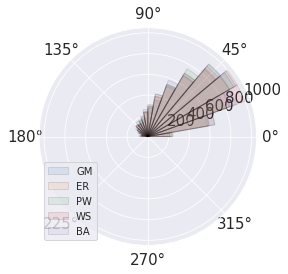

13


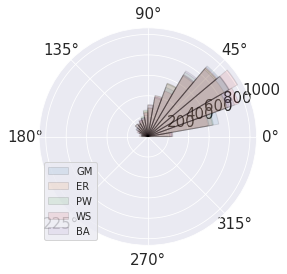

14


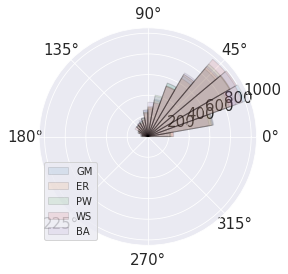

15


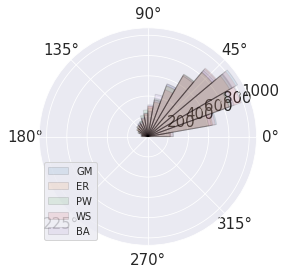

16


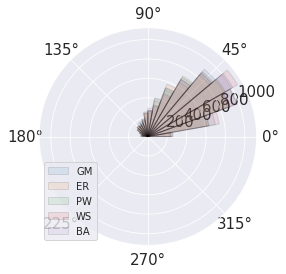

17


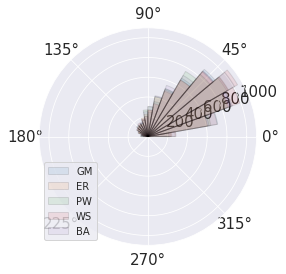

18


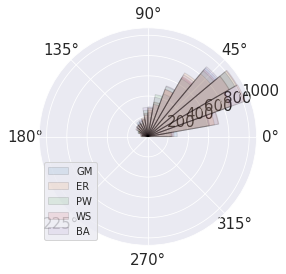

19


KeyboardInterrupt: 

In [96]:
tims = [0,50,100,150]    
for t in df.time.unique():
    print(t)
    df_at_zero = df[df.time == t]
    graph_types = df.type.unique()
    colors = current_palette = sns.color_palette()[:5]
    for i,gt in enumerate(graph_types):
        angles = df_at_zero[df_at_zero.type == gt].angle
        #plt.hist(angles)
        roseplot(angles,gt,colors[i])

    plt.legend(loc = 3)
    plt.show()

0
12
24
48


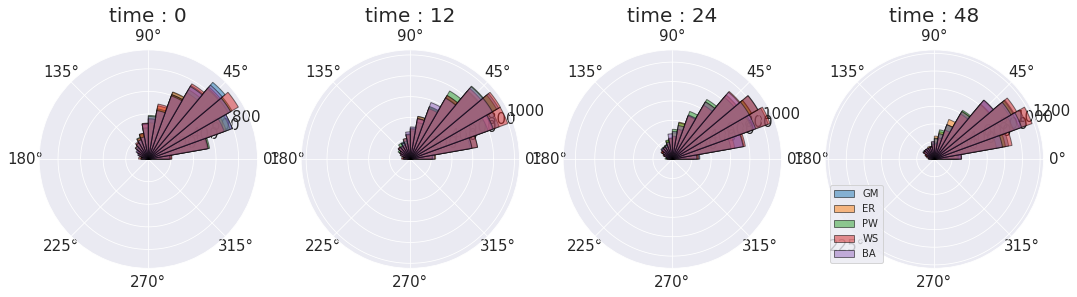

In [119]:

def roseplot(angles,gtype,color,fig,j):
    #degrees = np.random.randint(0, 360, size=200)
    tims = [0,12,24,48]
    radians = np.deg2rad(angles)

    bin_size = 10
    a , b=np.histogram(angles, bins=np.arange(0, 360+bin_size, bin_size))
    centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])

    #fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(1,4,j + 1, projection='polar')
    ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color=color, edgecolor='k',alpha = .5,label = gtype)
    ax.set_title('time : ' + str(tims[j]), size=20,y=1.1)


fig = plt.figure(figsize = (18,6))
tims = [0,12,24,48]    
for j,t in enumerate(tims):
    print(t)
    df_at_zero = df[df.time == t]
    graph_types = df.type.unique()
    colors = current_palette = sns.color_palette()[:5]
    for i,gt in enumerate(graph_types):
        angles = df_at_zero[df_at_zero.type == gt].angle
        #plt.hist(angles)
        roseplot(angles,gt,colors[i],fig,j)

plt.legend(loc = 3)
plt.show()


0
12
24
48


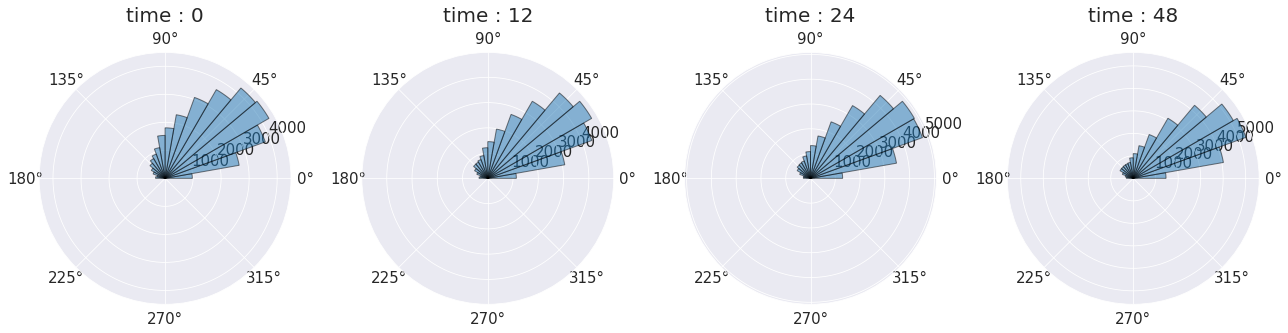

In [98]:


fig = plt.figure(figsize = (18,6))
tims = [0,12,24,48]    
for j,t in enumerate(tims):
    print(t)
    df_at_zero = df[df.time == t]
    graph_types = df.type.unique()
    colors = current_palette = sns.color_palette()[:5]
    angles = df_at_zero.angle
        #plt.hist(angles)
    roseplot(angles,gt,colors[0],fig,j)
plt.tight_layout()
plt.show()


In [99]:
df = pd.read_csv('../data/PRFDR_relangles.csv',index_col = 0)
df.head()
print(max(df.time))

197


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


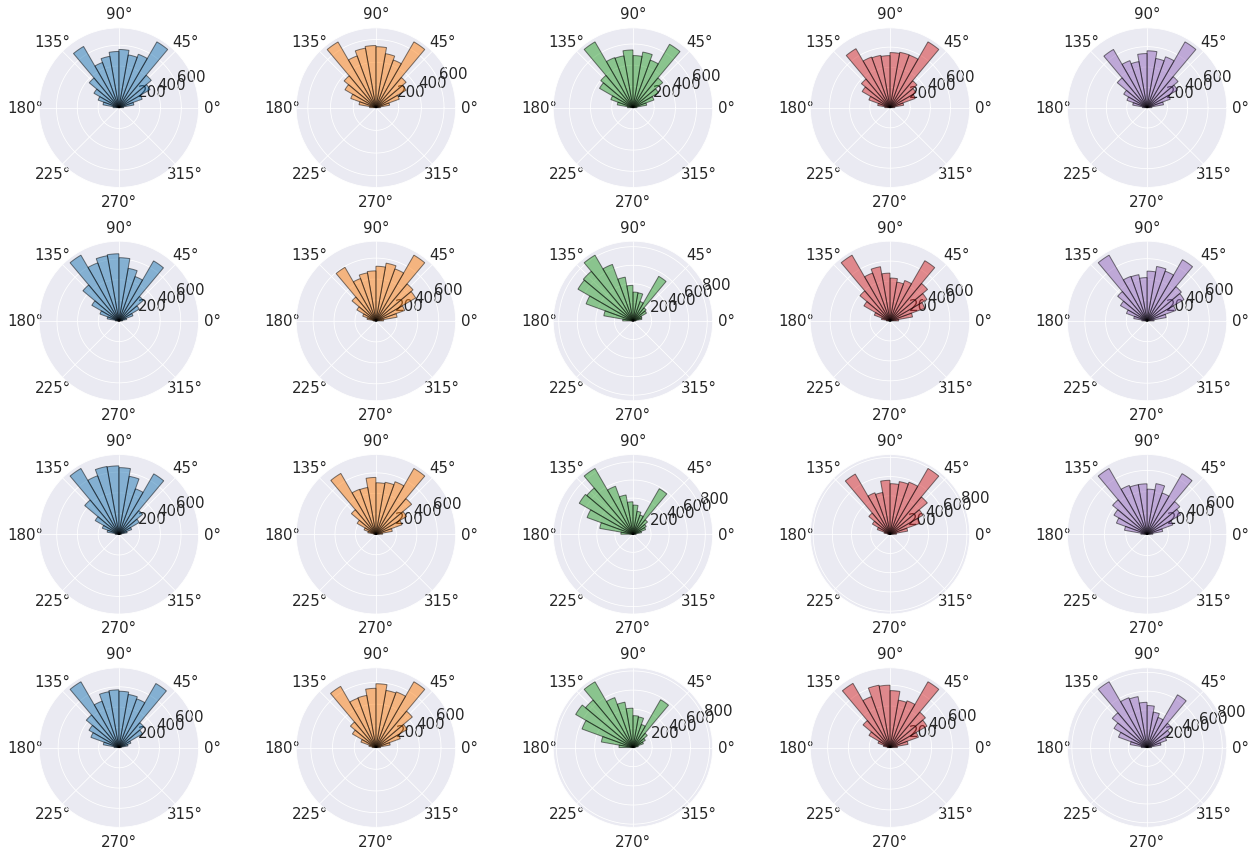

In [100]:

def roseplot(angles,gtype,color,fig,count):
    #degrees = np.random.randint(0, 360, size=200)
    radians = np.deg2rad(angles)

    bin_size = 10
    a , b=np.histogram(angles, bins=np.arange(0, 360+bin_size, bin_size))
    centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])

    #fig = plt.figure(figsize=(10,8))
    print(count)
    ax = fig.add_subplot(4,5,count, projection='polar')
    ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color=color, edgecolor='k',alpha = .5,label = gtype)

fig = plt.figure(figsize = (18,12))
tims = [0,50,100,197]    
count = 1
for j,t in enumerate(tims):
    df_at_zero = df[df.time == t]
    graph_types = df.type.unique()
    colors = current_palette = sns.color_palette()[:5]
    for i,gt in enumerate(graph_types):
        angles = df_at_zero[df_at_zero.type == gt].angle
        #plt.hist(angles)
        roseplot(angles,gt,colors[i],fig,count)
        count += 1

plt.tight_layout()
plt.show()


In [ ]:
### standard deviation in turning angle over time per graph type : 
